In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('/content/Hospital_Billing_Prediction.csv')

In [ ]:
df.head()

,Patient_ID,Age,Gender,Admission_Type,Length_of_Stay,Disease_Type,Previous_Hospitalizations,Insurance_Type,Procedure_Type,Billing_Amount
0,509d24a1-fadc-476c-8259-9cada7215121,21.0,Female,Urgent,25.0,Oncology,4,Private,Surgery,35544
1,57ea25f3-6316-48fc-9609-b02865b31cdb,72.0,Female,Emergency,22.0,Neurological,3,Private,Surgery,30294
2,901fa4cd-cf86-4dce-89b6-f5e8aaeffd6e,42.0,Male,Emergency,21.0,Respiratory,0,Private,Diagnostic,31493
3,8466df72-c9da-4ac1-a6cf-755244837bb4,51.0,Male,Elective,6.0,Cardiac,4,NaN,Diagnostic,19227
4,8f3f108f-5351-41e2-a295-e0058118b212,66.0,Male,Emergency,NaN,Neurological,3,Government,Rehabilitation,25180


In [ ]:
df.shape

(966, 10)

In [ ]:
data_cols=df.columns.tolist()
print(data_cols)

['Patient_ID', 'Age', 'Gender', 'Admission_Type', 'Length_of_Stay', 'Disease_Type', 'Previous_Hospitalizations', 'Insurance_Type', 'Procedure_Type', 'Billing_Amount']


In [ ]:
df.describe()

,Age,Length_of_Stay,Previous_Hospitalizations,Billing_Amount
count,932.000000,942.000000,966.000000,966.000000
mean,52.309013,15.161359,1.996894,25005.581781
std,21.009000,8.251073,1.418235,14655.301574
min,18.000000,1.000000,0.000000,502.000000
25%,34.000000,8.000000,1.000000,11545.250000
50%,52.000000,15.000000,2.000000,25228.500000
75%,71.000000,22.000000,3.000000,37448.000000
max,89.000000,29.000000,4.000000,49914.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Patient_ID                 966 non-null    object 
 1   Age                        932 non-null    float64
 2   Gender                     966 non-null    object 
 3   Admission_Type             966 non-null    object 
 4   Length_of_Stay             942 non-null    float64
 5   Disease_Type               966 non-null    object 
 6   Previous_Hospitalizations  966 non-null    int64  
 7   Insurance_Type             623 non-null    object 
 8   Procedure_Type             966 non-null    object 
 9   Billing_Amount             966 non-null    int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 75.6+ KB


In [ ]:
df.isnull().sum()

,0
Patient_ID,0
Age,34
Gender,0
Admission_Type,0
Length_of_Stay,24
Disease_Type,0
Previous_Hospitalizations,0
Insurance_Type,343
Procedure_Type,0
Billing_Amount,0


In [ ]:
df.drop(columns=['Patient_ID'], inplace=True)

In [ ]:
num_columns = df.select_dtypes(include=['float64', 'int64']).columns
cat_columns = df.select_dtypes(include=['object']).columns

In [ ]:
df[num_columns] = df[num_columns].fillna(df[num_columns].mean())

In [ ]:
df[cat_columns] = df[cat_columns].fillna(df[cat_columns].mode().iloc[0])

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Admission_Type,0
Length_of_Stay,0
Disease_Type,0
Previous_Hospitalizations,0
Insurance_Type,0
Procedure_Type,0
Billing_Amount,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in cat_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])

In [ ]:
X = df.drop('Billing_Amount', axis=1)

In [ ]:
y = df['Billing_Amount']

In [ ]:
print(df)

          Age  Gender  Admission_Type  Length_of_Stay  Disease_Type  \
0    0.042254       0               2        0.857143             2   
1    0.760563       0               1        0.750000             1   
2    0.338028       1               1        0.714286             4   
3    0.464789       1               0        0.178571             0   
4    0.676056       1               1        0.505763             1   
..        ...     ...             ...             ...           ...   
961  0.483226       0               1        0.392857             4   
962  0.000000       0               0        0.892857             1   
963  0.478873       0               1        0.535714             0   
964  0.323944       1               2        0.000000             1   
965  0.507042       0               0        0.714286             1   

     Previous_Hospitalizations  Insurance_Type  Procedure_Type  Billing_Amount  
0                         1.00               1               3    

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
linreg_pred = linreg_model.predict(X_test)
linreg_mse = mean_squared_error(y_test, linreg_pred)
linreg_mae = mean_absolute_error(y_test, linreg_pred)
linreg_r2 = r2_score(y_test, linreg_pred)

In [ ]:
print(f'Mean Squared Error: {linreg_mse}')
print(f'Mean Absolute Error: {linreg_mae}')
print(f'R-squared: {linreg_r2}')

Mean Squared Error: 0.07797846031059653
Mean Absolute Error: 0.23817843875580821
R-squared: -0.02540708186776608


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

In [ ]:
print(f'Mean Squared Error: {rf_mse}')
print(f'Mean Absolute Error: {rf_mae}')
print(f'R-squared: {rf_r2}')

Mean Squared Error: 0.08875667206620788
Mean Absolute Error: 0.2515429930206027
R-squared: -0.16713922969490658


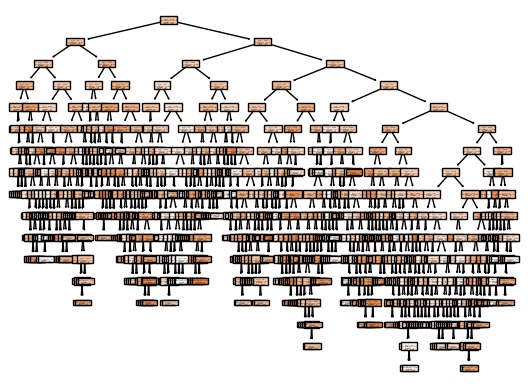

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plot_tree(rf_model.estimators_[0], filled=True)
plt.show()

In [ ]:
best_model = linreg_model if linreg_mse < rf_mse else rf_model

In [ ]:
import pickle

with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Best model saved as 'best_model.pkl'")

Best model saved as 'best_model.pkl'
